<a href="https://colab.research.google.com/github/RahafAlharthi/Projects/blob/master/Parking_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 871.1/871.1 kB 24.3 MB/s eta 0:00:00


## Get the data from [RoboFlow](https://universe.roboflow.com/)

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="4pBPvG7DyZBUiMRnABt9")
project = rf.workspace("model-version2").project("parking-detection-ewm7h")
version = project.version(3)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.82, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Parking-Detection-3 in yolov8:: 100%|██████████| 4042/4042 [00:00<00:00, 4640.22it/s]


# Custom Model

## Train the model using the CLI

In [ ]:
!yolo task=detect mode=train model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=600

Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Parking-Detection-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=600, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
from IPython import display
display.clear_output()

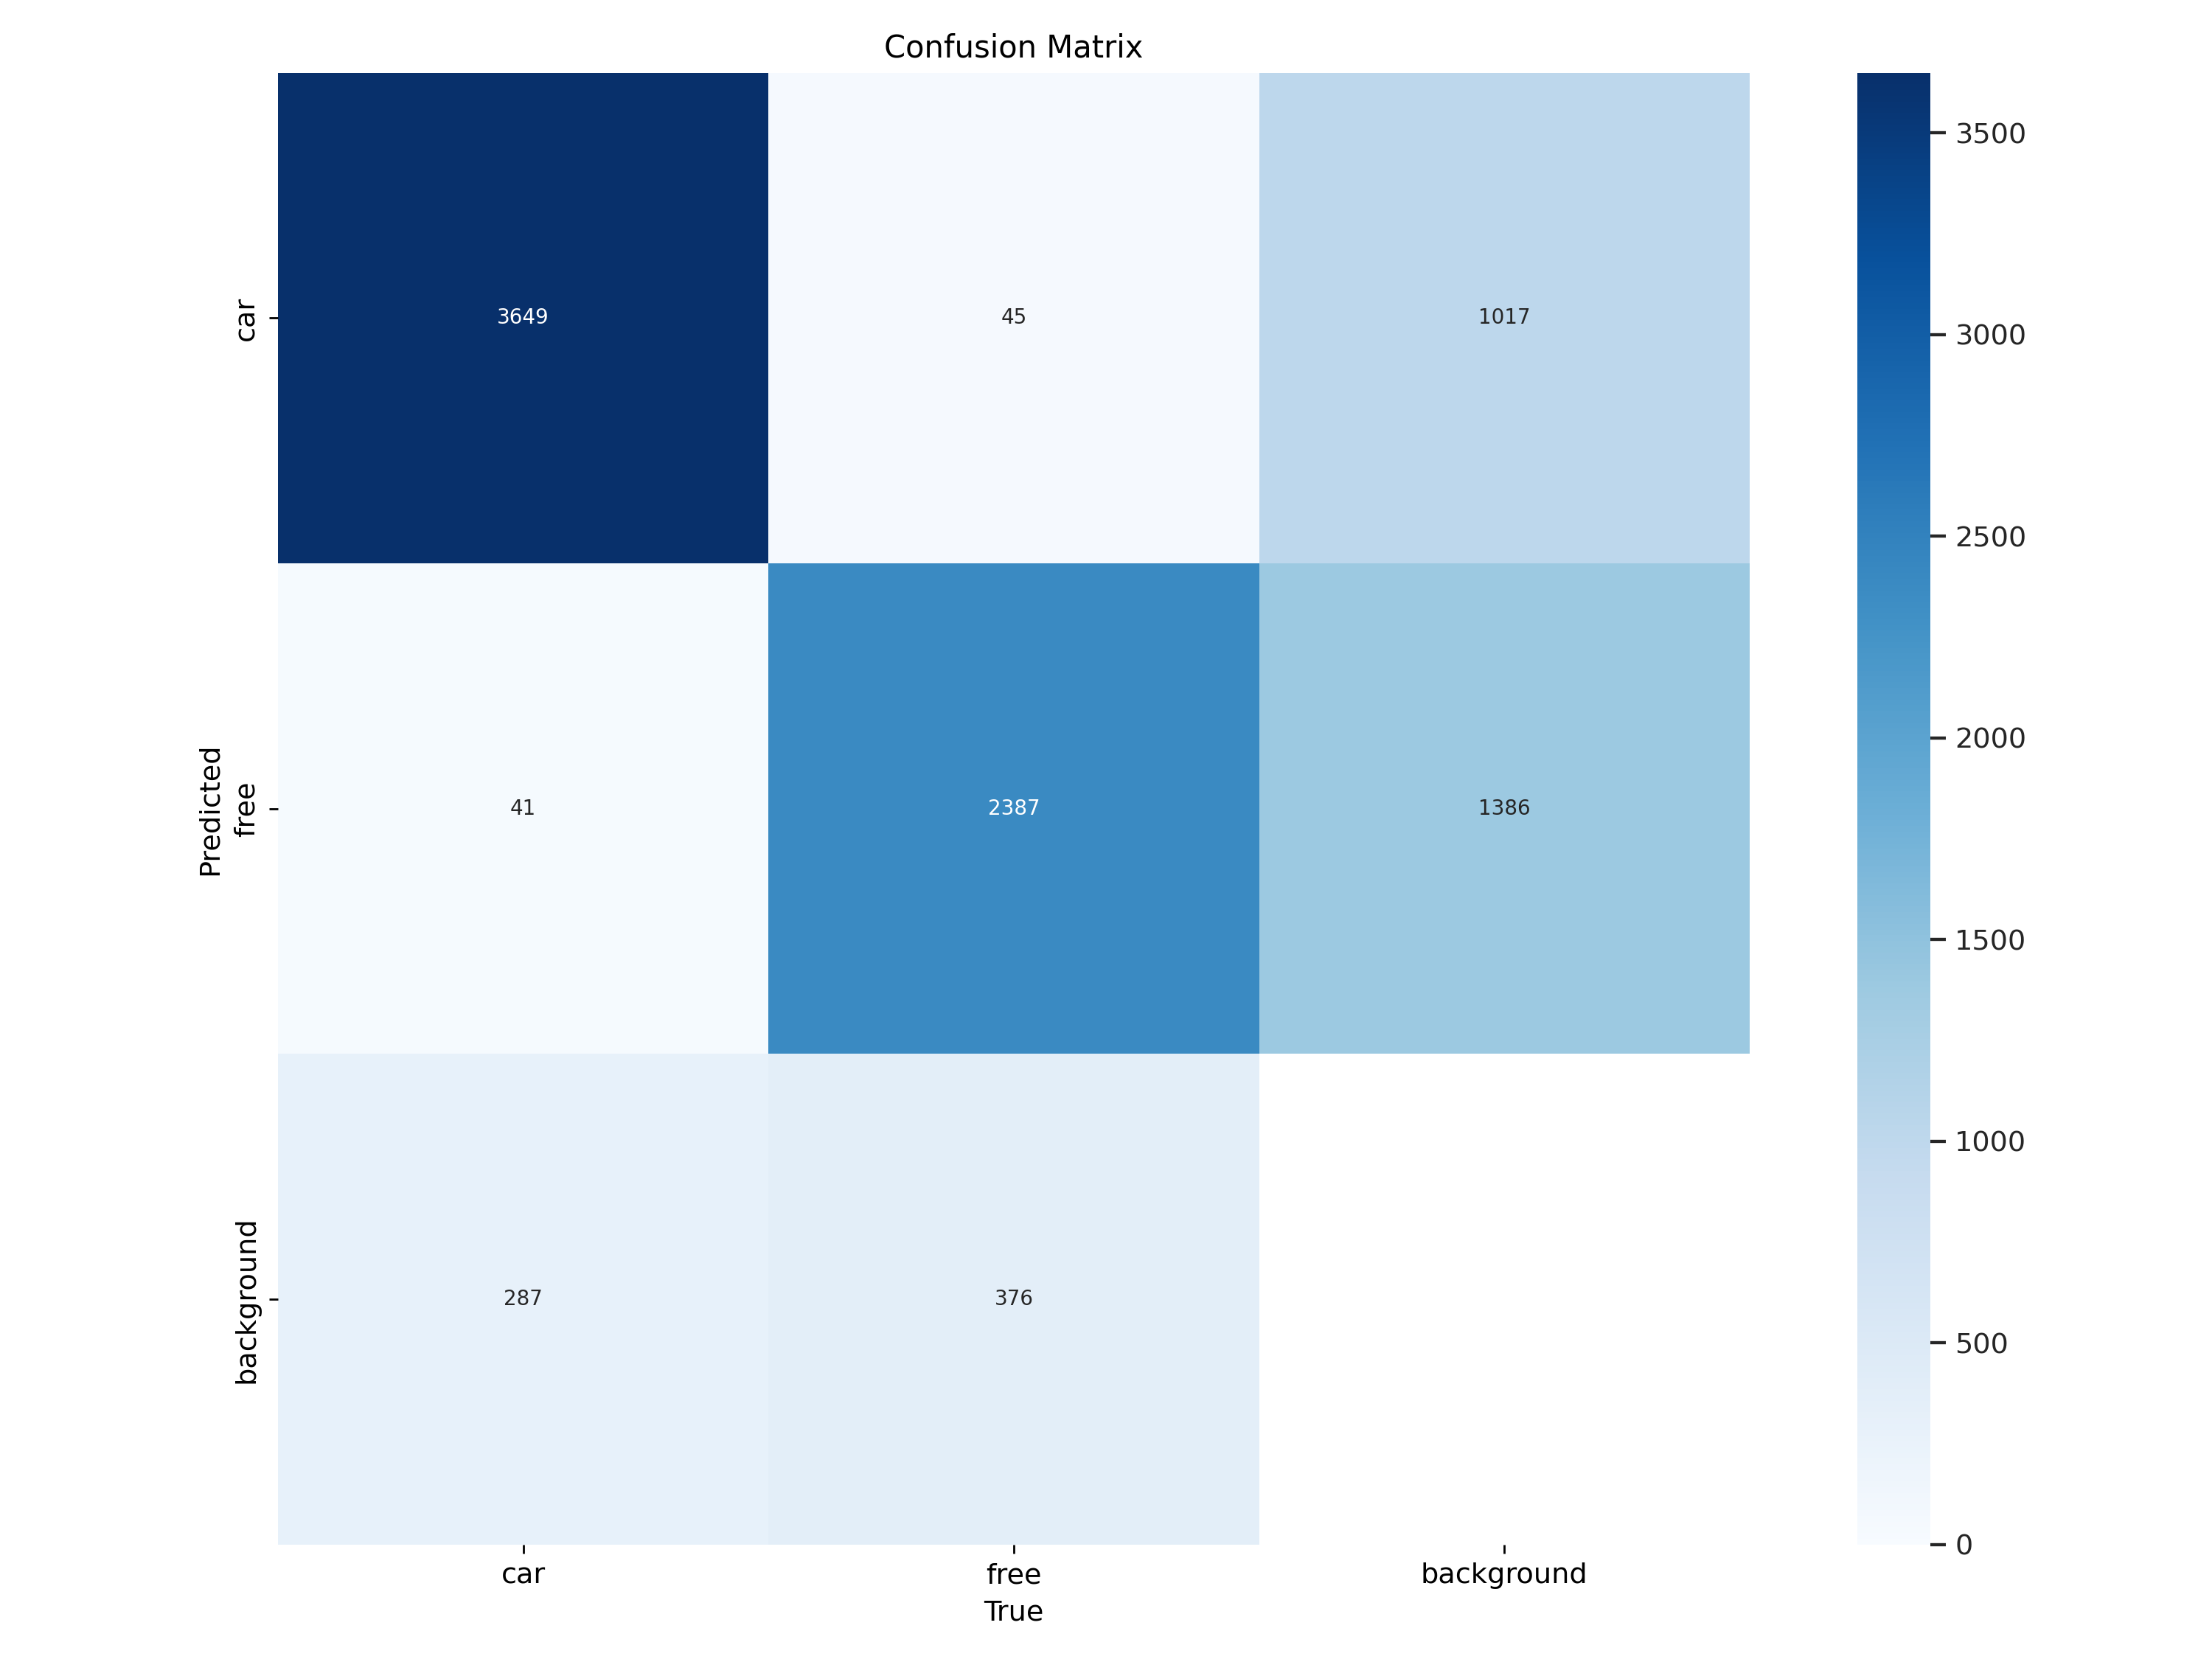

In [ ]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', height=600)

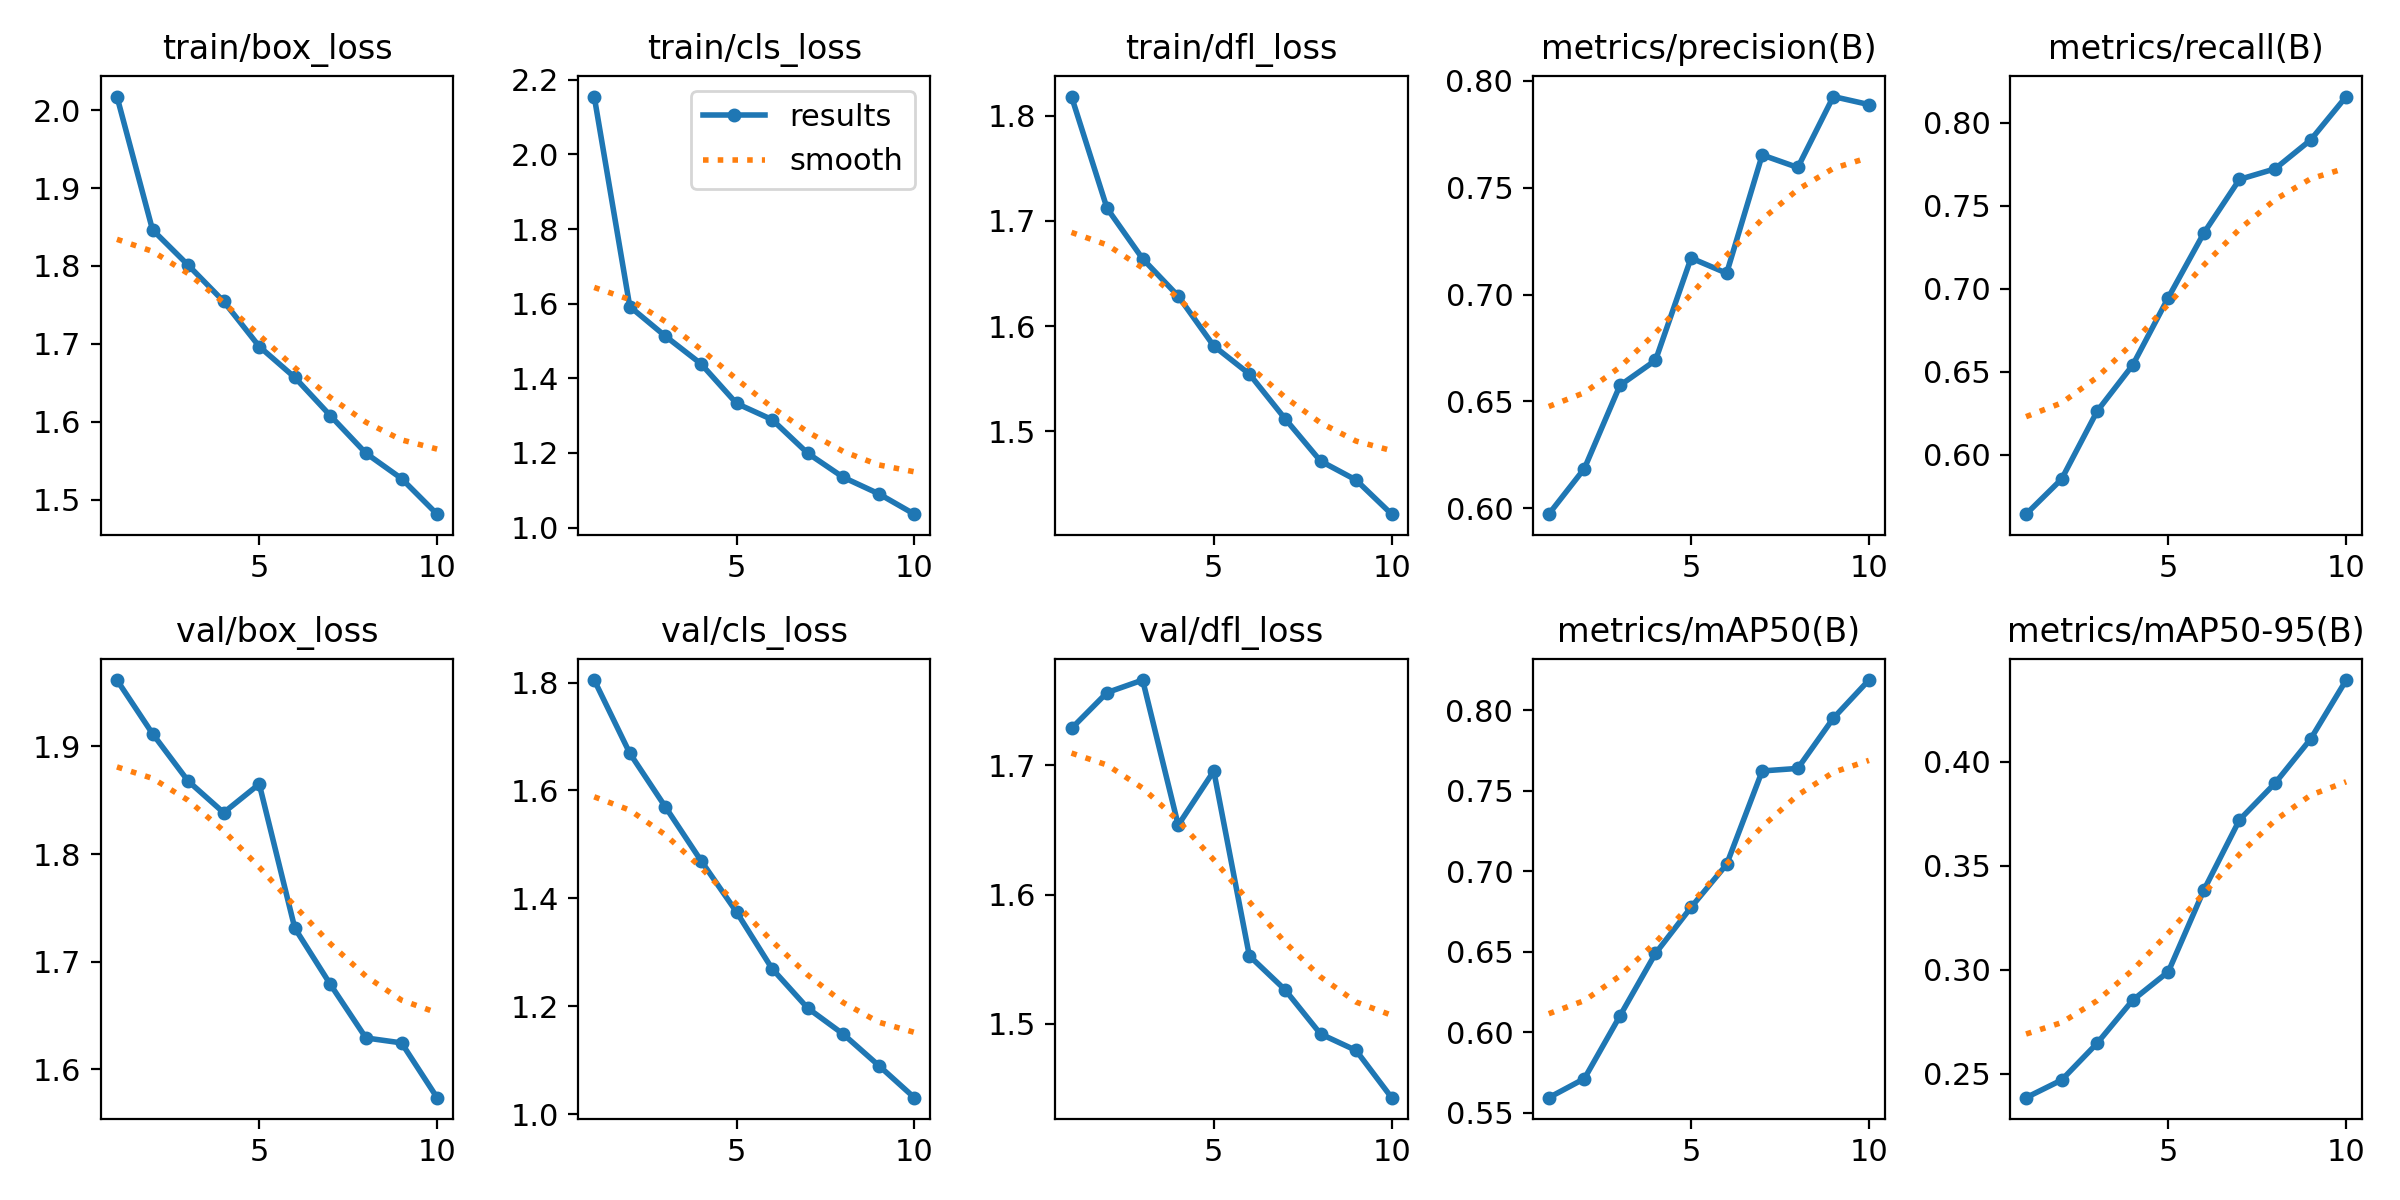

In [ ]:
Image(filename='/content/runs/detect/train2/results.png', height=600)

## Using OpenCV with YOLO to handle videos

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt data={dataset.location}/data.yaml epochs=10 imgsz=600

WARNING ⚠️ 'source' argument is missing. Using default 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.
Ultralytics YOLOv8.2.82 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

WARNING ⚠️ imgsz=[600] must be multiple of max stride 32, updating to [608]
image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 608x480 4 persons, 1 bus, 44.3ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 352x608 2 persons, 2 ties, 46.0ms
Speed: 3.1ms preprocess, 45.1ms inference, 316.4ms postprocess per image at shape (1, 3, 352, 608)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


#### Load the Model

In [ ]:
import cv2
from ultralytics import YOLO
model = YOLO('/content/runs/detect/train/weights/best.pt')

## Get the video for the example

In [ ]:
video_path = '/content/after_crop.mp4'
cap = cv2.VideoCapture(video_path)

In [ ]:
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

In [ ]:
output_path = '/content/output.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

In [ ]:
ret, frame = cap.read()

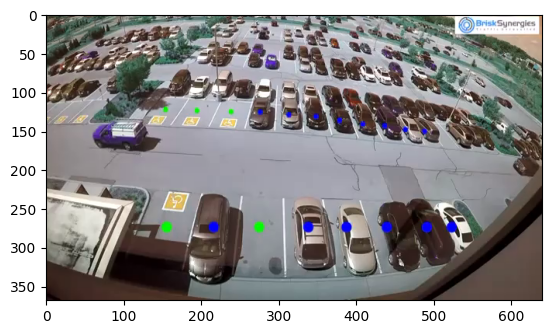

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(frame)

In [ ]:
results = model(frame)


0: 352x608 99 cars, 1 free, 9.5ms
Speed: 2.0ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 608)


array([[[ 75,  72,  57],
        [ 75,  72,  57],
        [ 74,  71,  56],
        ...,
        [196, 145,  99],
        [209, 143,  93],
        [209, 143,  93]],

       [[ 81,  78,  63],
        [ 78,  75,  60],
        [ 72,  69,  54],
        ...,
        [195, 144,  98],
        [209, 143,  93],
        [209, 143,  93]],

       [[ 77,  74,  59],
        [ 75,  72,  57],
        [ 73,  70,  55],
        ...,
        [189, 143, 103],
        [202, 142,  97],
        [203, 143,  98]],

       ...,

       [[ 34,  19,  22],
        [ 31,  16,  19],
        [ 29,  14,  17],
        ...,
        [ 86,  68,  60],
        [ 86,  68,  60],
        [ 86,  68,  60]],

       [[ 32,  17,  20],
        [ 34,  19,  22],
        [ 35,  20,  23],
        ...,
        [ 86,  68,  60],
        [ 86,  68,  60],
        [ 86,  68,  60]],

       [[ 32,  17,  20],
        [ 35,  20,  23],
        [ 39,  24,  27],
        ...,
        [ 86,  68,  60],
        [ 86,  68,  60],
        [ 86,  68,  60]]], dtype=uint8)
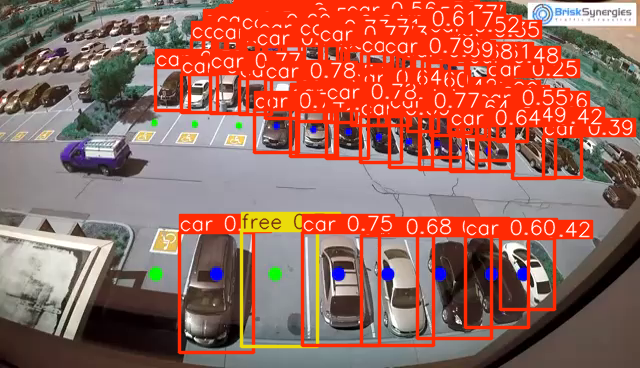

In [ ]:
results[0].plot()

In [ ]:
for result in results:
    for box in result.boxes:
        print("Bounding Box:", box.xyxy)
        print("Confidence:", box.conf)
        print("Class Label Index:", box.cls)
        print("----")

Bounding Box: tensor([[384.4090,  54.0528, 411.4326,  88.3734]], device='cuda:0')
Confidence: tensor([0.7874], device='cuda:0')
Class Label Index: tensor([0.], device='cuda:0')
----
Bounding Box: tensor([[326.4518, 100.9240, 368.8915, 158.6209]], device='cuda:0')
Confidence: tensor([0.7842], device='cuda:0')
Class Label Index: tensor([0.], device='cuda:0')
----
Bounding Box: tensor([[361.9998,  53.4507, 391.5459,  86.9876]], device='cuda:0')
Confidence: tensor([0.7835], device='cuda:0')
Class Label Index: tensor([0.], device='cuda:0')
----
Bounding Box: tensor([[265.1240,  79.8971, 298.5239, 118.0162]], device='cuda:0')
Confidence: tensor([0.7792], device='cuda:0')
Class Label Index: tensor([0.], device='cuda:0')
----
Bounding Box: tensor([[389.1006, 109.3570, 432.5451, 167.1816]], device='cuda:0')
Confidence: tensor([0.7691], device='cuda:0')
Class Label Index: tensor([0.], device='cuda:0')
----
Bounding Box: tensor([[210.7732,  69.6483, 247.8268, 113.2058]], device='cuda:0')
Confiden

In [ ]:
color = (0, 255, 0)
thickness = 2
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.5
font_thickness = 1

# Set to track unique object IDs
unique_ids = set()
roi_top = (0, 0, width, height // 2)    # Top half of the frame
roi_bottom = (0, height // 2, width, height)  # Bottom half of the frame

unique_ids_top = set()
unique_ids_bottom = set()
ret = True
while ret:
    ret, frame = cap.read()

    if not ret:
        break

    results = model.track(frame, persist=True)

    for result in results:
        for obj in result.boxes:
            bbox = obj.xyxy[0].cpu().numpy()
            class_id = int(obj.cls[0].cpu().numpy()) if obj.cls is not None else -1
            conf = obj.conf[0].cpu().numpy() if obj.conf is not None else 0.0
            obj_id = int(obj.id[0].cpu().numpy()) if obj.id is not None else -1

            unique_ids.add(obj_id)

            x1, y1, x2, y2 = map(int, bbox)
            center_x, center_y = (x1 + x2) // 2, (y1 + y2) // 2

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, thickness)

            label = f'ID: {obj_id} Class: {class_id} Conf: {conf:.2f}'

            cv2.putText(frame, label, (x1, y1 - 10), font, font_scale, color, font_thickness, cv2.LINE_AA)

            if roi_top[0] <= center_x <= roi_top[2] and roi_top[1] <= center_y <= roi_top[3]:
                unique_ids_top.add(obj_id)
            # Check if the car is in the bottom ROI
            elif roi_bottom[0] <= center_x <= roi_bottom[2] and roi_bottom[1] <= center_y <= roi_bottom[3]:
                unique_ids_bottom.add(obj_id)

    # Print the unique object count at the bottom of the frame, top and total
    unique_count_label = f'Total Unique Objects: {len(unique_ids)}'
    cv2.putText(frame, unique_count_label, (10, height - 20), font, font_scale, color, font_thickness, cv2.LINE_AA)
    top_cars =  f'Top cars: {len(unique_ids_top)}'
    cv2.putText(frame, top_cars, (10, height - 40), font, font_scale, color, font_thickness, cv2.LINE_AA)
    bottom_cars=  f'Bottom cars: {len(unique_ids_bottom)}'
    cv2.putText(frame, bottom_cars, (10, height - 60), font, font_scale, color, font_thickness, cv2.LINE_AA)

    out.write(frame)

cap.release()
out.release()


0: 352x608 35 cars, 1 free, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 9.3ms
Speed: 3.4ms preprocess, 9.3ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 6.9ms
Speed: 1.8ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 7.1ms
Speed: 2.6ms preprocess, 7.1ms inference, 1.6ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 6.9ms
Speed: 2.1ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 6.9ms
Speed: 2.9ms preprocess, 6.9ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 352, 608)

0: 352x608 35 cars, 1 free, 7.7ms
Speed: 2.3ms preprocess, 7.7ms inference, 1.5ms 

In [ ]:
print(len(unique_ids_bottom))
print(len(unique_ids_top))

7
39
